In [1]:
import cv2
import numpy as np
import os

# Chemins vers les dossiers de données d'entraînement et de test
train_data_folder = "D:/UQAC ETE 2023/8INF867_Fondamentaux de l'apprentissage automatique/Projet/FAA_Project/FAA_project/data/train_10000/train_10000"  # Mettez le bon chemin vers votre dossier de train
test_data_folder = "D:/UQAC ETE 2023/8INF867_Fondamentaux de l'apprentissage automatique/Projet/FAA_Project/FAA_project/data/data"  # Mettre le bon chemin
emotions = ["anger", "disgust", "fear", "happiness", "neutral", "sadness", "surprise"]

# Prétraitement des données
def preprocess_data(data_directory):
    images = []
    labels = []

    for emotion in emotions:
        emotion_path = os.path.join(data_directory, emotion)
        for image_name in os.listdir(emotion_path):
            image_path = os.path.join(emotion_path, image_name)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Charger l'image en niveaux de gris
            image = cv2.resize(image, (48, 48))  # Redimensionner l'image
            images.append(image)
            labels.append(emotions.index(emotion))  # Étiqueter l'image avec l'indice de l'émotion

    return np.array(images), np.array(labels)

# Chargement des données d'entraînement
train_images, train_labels = preprocess_data(train_data_folder)

# Chargement des données de test
test_images, test_labels = preprocess_data(test_data_folder)

In [2]:
# Reduce the samples to train
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Determine the desired sample size
sample_size = 8000

# Convert train_images to a NumPy array
train_images_array = np.array(train_images)
print(train_images_array.shape)

# Reshape train_images_array into a 2D array
n_samples = train_images_array.shape[0]
train_images_2d = train_images_array.reshape((n_samples, -1))

# Convert train_images_2d to DataFrame
train_data_df = pd.DataFrame(train_images_2d, columns=[f'feature_{i}' for i in range(train_images_2d.shape[1])])

# Perform random sampling while maintaining the same proportion for each class
X_train_df, _, y_train, _ = train_test_split(train_data_df, train_labels, train_size=sample_size, stratify=train_labels, random_state=42)

# Extract the feature data as a 2D array
X_train = X_train_df.values

print(X_train.shape)

(69802, 48, 48)
(8000, 2304)


In [54]:
# Reducing the test set
# Determine the desired sample size
sample_size = 10000

# Convert test_images to a NumPy array
test_images_array = np.array(test_images)

# Reshape test_images_array into a 2D array
n_samples = test_images_array.shape[0]
test_images_2d = test_images_array.reshape((n_samples, -1))

# Convert test_images_2d to DataFrame
test_data_df = pd.DataFrame(test_images_2d, columns=[f'feature_{i}' for i in range(test_images_2d.shape[1])])

# Perform random sampling while maintaining the same proportion for each class
X_test_df, _, y_test, _ = train_test_split(test_data_df, test_labels, train_size=sample_size, stratify=test_labels, random_state=42)

# Extract the feature data as a 2D array
X_test = X_test_df.values

print(X_test.shape)

(10000, 2304)


In [55]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, cohen_kappa_score

from sklearn.svm import SVC

# #############################################################################
# Split into a training set and a validation set using a stratified k fold

# Define the number of folds
k = 5

# Initialize the stratified k-fold object
skf = StratifiedKFold(n_splits=k, random_state=42, shuffle=True)

# Lists to store the training and validation sets
train_indices = []
val_indices = []

# Perform stratified k-fold splitting
for train_index, val_index in skf.split(X_train, y_train):
    train_indices.append(train_index)
    val_indices.append(val_index)
    modified_val_index= val_index
    val_indices.append(modified_val_index)

In [58]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Access the data for each fold
for fold in range(k):
    train_data= np.array(X_train)[train_indices[fold]]
    train_labels_fold = np.array(y_train)[train_indices[fold]]
    X_val = np.array(X_train)[val_indices[fold]]
    val_labels_fold = np.array(y_train)[val_indices[fold]]
    print("Fold: ",fold, "X_train shape: ", train_data.shape, "y_train shape: ", train_labels_fold.shape, "X_val shape: ", X_val.shape, "y_val shape: ", val_labels_fold.shape)

    # Reshape images into a 2D array
    X_train_2d = train_data.reshape((train_data.shape[0], -1))
    X_val_2d = X_val.reshape((X_val.shape[0], -1))
    X_test_2d = X_test.reshape((X_test.shape[0], -1))

    #Scale the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_2d)
    X_val_scaled = scaler.transform(X_val_2d)
    X_test_scaled = scaler.transform(X_test_2d)

    # Compute PCA on the training and validation set
    n_components = 60  # Specify the desired number of components
    pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_val_pca = pca.transform(X_val_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Verify the shape of PCA-transformed images
    print("Shape of train images after PCA: ", X_train_pca.shape)
    print("Shape of validation images after PCA: ", X_val_pca.shape)
    print("Shape of test images after PCA: ", X_test_pca.shape)


Fold:  0 X_train shape:  (6400, 2304) y_train shape:  (6400,) X_val shape:  (1600, 2304) y_val shape:  (1600,)
Shape of train images after PCA:  (6400, 60)
Shape of validation images after PCA:  (1600, 60)
Shape of test images after PCA:  (10000, 60)
Fold:  1 X_train shape:  (6400, 2304) y_train shape:  (6400,) X_val shape:  (1600, 2304) y_val shape:  (1600,)
Shape of train images after PCA:  (6400, 60)
Shape of validation images after PCA:  (1600, 60)
Shape of test images after PCA:  (10000, 60)
Fold:  2 X_train shape:  (6400, 2304) y_train shape:  (6400,) X_val shape:  (1600, 2304) y_val shape:  (1600,)
Shape of train images after PCA:  (6400, 60)
Shape of validation images after PCA:  (1600, 60)
Shape of test images after PCA:  (10000, 60)
Fold:  3 X_train shape:  (6400, 2304) y_train shape:  (6400,) X_val shape:  (1600, 2304) y_val shape:  (1600,)
Shape of train images after PCA:  (6400, 60)
Shape of validation images after PCA:  (1600, 60)
Shape of test images after PCA:  (10000, 

In [59]:
from sklearn.model_selection import GridSearchCV
# Train a SVM classification model
# Define the parameter grid for grid search
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

# Initialize the SVM classifier
svm = SVC(kernel='rbf', class_weight='balanced')

# Perform grid search to find the best hyperparameters
optimal_params = GridSearchCV(svm, param_grid)
optimal_params.fit(X_train_pca, train_labels_fold)
# Print the best estimator found by grid search
print("Best hyperparameters found by grid search:")
print(optimal_params.best_params_)
print("Best estimator:")
print(optimal_params.best_estimator_)

Best hyperparameters found by grid search:
{'C': 10, 'gamma': 0.01}
Best estimator:
SVC(C=10, class_weight='balanced', gamma=0.01)


In [60]:
#Computing the SVM model with the best parameters obtained
from sklearn.metrics import accuracy_score
# List to save the model performance for each fold
accuracy_scores = []
# SVM model training on each fold
for fold in range(k):
    # Creation, training and evaluation for the current fold
    clf_svm = SVC(C= 10,kernel="rbf",gamma = 0.01, class_weight = 'balanced')
    clf_svm.fit(X_train_pca,train_labels_fold)

    y_pred_fold = clf_svm.predict(X_val_pca)
    accuracy = accuracy_score(val_labels_fold, y_pred_fold)
    accuracy_scores.append(accuracy)

    # Accuracy score for the current fold
    print("Fold:", fold+1, "Accuracy:", accuracy)

    # Evaluate the model for the current fold
    print("Classification Report:")
    print(classification_report(val_labels_fold, y_pred_fold))

    # Print confusion matrix for the current fold
    print("Confusion Matrix:")
    print(confusion_matrix(val_labels_fold, y_pred_fold))

    # Print Cohen's Kappa score for the current fold
    print("Cohen's Kappa score: ", cohen_kappa_score(val_labels_fold, y_pred_fold))
# Mean accuracy for all the folds
mean_accuracy = np.mean(accuracy_scores)
print("Mean Accuracy:", mean_accuracy)

Fold: 1 Accuracy: 0.94375
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96       229
           1       0.96      0.96      0.96       225
           2       0.98      0.91      0.94       229
           3       0.93      0.95      0.94       230
           4       0.91      0.96      0.93       229
           5       0.91      0.94      0.92       229
           6       0.94      0.97      0.95       229

    accuracy                           0.94      1600
   macro avg       0.95      0.94      0.94      1600
weighted avg       0.95      0.94      0.94      1600

Confusion Matrix:
[[211   3   2   1   2   8   2]
 [  0 217   0   1   4   2   1]
 [  0   3 209   1   5   7   4]
 [  0   1   2 218   5   1   3]
 [  0   2   0   6 219   2   0]
 [  0   0   1   4   4 215   5]
 [  0   0   0   4   2   2 221]]
Cohen's Kappa score:  0.9343745001182626
Fold: 2 Accuracy: 0.94375
Classification Report:
              precision    r

In [75]:
import pickle
# Save the pca model object
pca_svm = 'pca_svm_model.pkl'
with open(pca_svm, 'wb') as file:
    pickle.dump(pca, file)
file.close()
print("File ", pca_svm,' saved')

File  pca_svm_model.pkl  saved


In [76]:
# Load the saved pca model
pca_svm = 'pca_svm_model.pkl'
with open(pca_svm, 'rb') as file:
    loaded_pca_svm = pickle.load(file)

In [77]:
import pickle
# Save the model object
model_svm = 'svm_model.pkl'
with open(model_svm, 'wb') as file:
    pickle.dump(clf_svm, file)

In [78]:
# Load the saved model
model_svm = 'svm_model.pkl'
with open(model_svm, 'rb') as file:
    loaded_svm = pickle.load(file)

In [79]:
from time import time
# Evaluating on the test set

print("Predicting on the test set")
t0 = time()
y_pred = loaded_svm.predict(X_test_pca)
print("done in %0.3fs" % (time() - t0))

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print Cohen's Kappa score
print("Cohen's Kappa score: ", cohen_kappa_score(y_test, y_pred))

Predicting on the test set
done in 10.949s
Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.34      0.32      1429
           1       0.47      0.52      0.49      1429
           2       0.28      0.24      0.25      1429
           3       0.48      0.42      0.45      1428
           4       0.33      0.39      0.36      1428
           5       0.35      0.30      0.33      1429
           6       0.59      0.59      0.59      1428

    accuracy                           0.40     10000
   macro avg       0.40      0.40      0.40     10000
weighted avg       0.40      0.40      0.40     10000

Confusion Matrix:
[[485 149 148 162 190 191 104]
 [200 738 115  62 142 122  50]
 [275 242 336  99 204 141 132]
 [173 124 113 597 205 110 106]
 [193 110 147 146 553 175 104]
 [229 130 168 128 261 434  79]
 [ 83  76 191  59 119  64 836]]
Cohen's Kappa score:  0.29755042849423863


(1, 2304)
(1, 60)
done in 0.000s


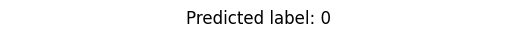

In [80]:
from matplotlib import pyplot as plt

# Prediction sur 1 image
# Identify the image in the dataframe
image = test_data_df.iloc[3,:]

# Reshape the image into 2D-array
image = image.values.reshape(1,-1)
print(image.shape)

# Apply PCA on the 2D-array image
image_pca = pca.transform(image)
print(image_pca.shape)

# Make prediction on the image
t0 = time()
y_pred = loaded_svm.predict(image_pca)
print("done in %0.3fs" % (time() - t0))

%matplotlib inline
# Create a subplot
fig, ax = plt.subplots()

# Display the image
plt.imshow(image, cmap='gray')
plt.axis('off')

# Display the predicted label
plt.title("Predicted label: {}".format(y_pred[0]))

# Show the plot
plt.show()

In [81]:
# Saving the metrics of the model in a dictionary
# from sklearn.metrics import cohen_kappa_score
# from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import accuracy_score
# import pickle
#
# def save_element(x, name="element", binary=True, ext=".pkl"):
#     if binary:
#         mode = 'wb'
#         encod='_bin'
#     else:
#         encod=""
#         mode = 'w'
#     file = open(name +encod + ext, mode)
#     pickle.dump(x, file)
#     file.close()
#     print("File "+name+" saved")
#
# hist = {
#     'test_accuracy': accuracy_score(y_test, y_pred),
#     'test_report': classification_report(y_test, y_pred, output_dict=False, target_names=emotions),
#     'test_report_dict': classification_report(y_test, y_pred, output_dict=True, target_names=emotions),
#     'test_cf_matrix': confusion_matrix(y_test, y_pred),
#     'test_kappa': cohen_kappa_score(y_test, y_pred)}
#
# save_element(hist, "history_dict_svm1")

ValueError: Found input variables with inconsistent numbers of samples: [10000, 1]